In [ ]:
import pandas as pd

file_path = '/content/final_weather_data.csv'
weather_data = pd.read_csv(file_path)

weather_data.head(), weather_data.info(), weather_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      730 non-null    object 
 1   Weather_Condition         730 non-null    object 
 2   Dew_Point (°C)            730 non-null    float64
 3   Humidity (%)              730 non-null    float64
 4   Pressure (hPa)            730 non-null    float64
 5   Temperature (°C)          730 non-null    float64
 6   Visibility (km)           730 non-null    float64
 7   Wind_Direction (Compass)  730 non-null    object 
 8   Rain_Presence             730 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 51.5+ KB


(          Date Weather_Condition  Dew_Point (°C)  Humidity (%)  \
 0  01-Jan-2015             Smoke            11.0          43.0   
 1  02-Jan-2015        Light Rain            15.0         100.0   
 2  04-Jan-2015             Smoke            10.0          51.0   
 3  05-Jan-2015              Haze             9.0          36.0   
 4  06-Jan-2015             Smoke             9.0          50.0   
 
    Pressure (hPa)  Temperature (°C)  Visibility (km) Wind_Direction (Compass)  \
 0          1016.0              21.0              1.0                      NNW   
 1          1017.0              15.0              1.0                       NE   
 2          1019.0              18.0              1.0                       NW   
 3          1014.0              21.0              2.0                      WNW   
 4          1014.0              17.0              1.0                       NW   
 
    Rain_Presence  
 0              0  
 1              1  
 2              0  
 3              0  
 4

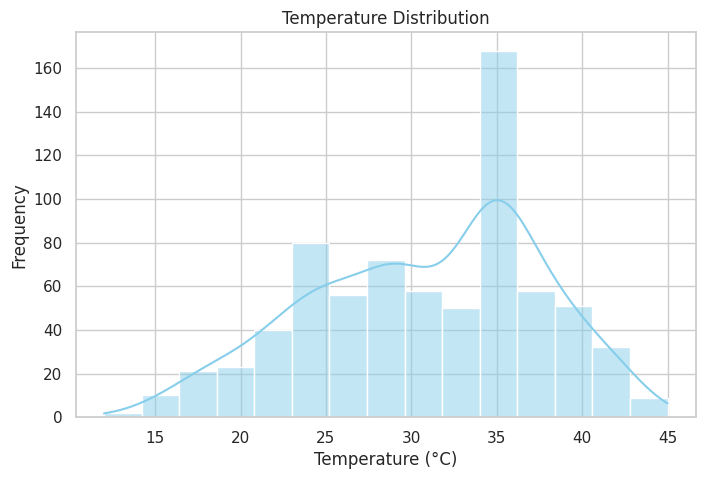

<ipython-input-3-cd5aba06c770>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rain_Presence", data=weather_data, palette="viridis")


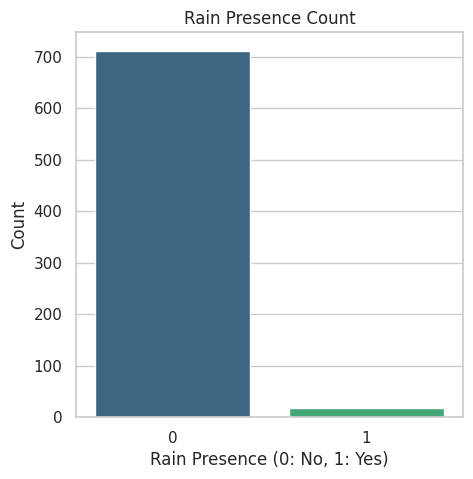

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(weather_data["Temperature (°C)"], kde=True, color="skyblue")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(5, 5))
sns.countplot(x="Rain_Presence", data=weather_data, palette="viridis")
plt.title("Rain Presence Count")
plt.xlabel("Rain Presence (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

label_encoders = {}
for col in ["Weather_Condition", "Wind_Direction (Compass)"]:
    le = LabelEncoder()
    weather_data[col] = le.fit_transform(weather_data[col])
    label_encoders[col] = le

X = weather_data.drop(columns=["Date", "Rain_Presence"])
y = weather_data["Rain_Presence"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

classification_rep, accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


('              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       214\n           1       0.00      0.00      0.00         5\n\n    accuracy                           0.98       219\n   macro avg       0.49      0.50      0.49       219\nweighted avg       0.95      0.98      0.97       219\n',
 0.9771689497716894)

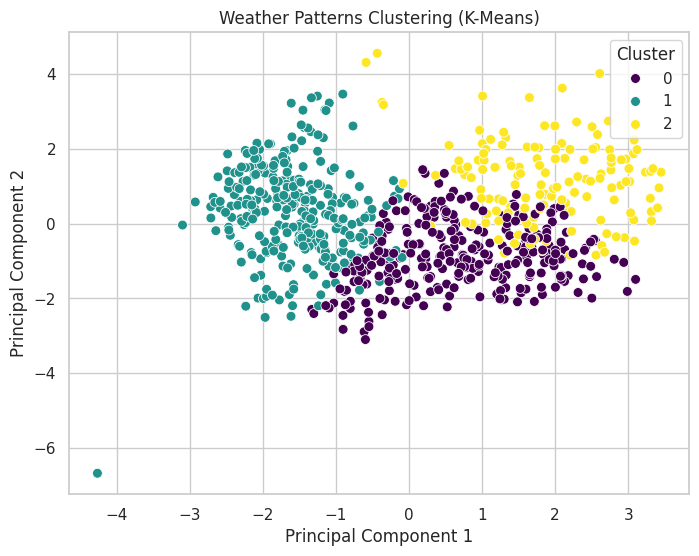

(Cluster
 0    296
 1    293
 2    141
 Name: count, dtype: int64,
 array([[-0.47107997, -0.70165668, -0.52415228,  0.52892581, -0.24257881,
          0.11878976,  0.30619432],
        [-0.2976604 ,  0.93822013,  0.23268872, -0.9651359 ,  0.76249722,
          0.14528993, -0.22651589],
        [ 1.62108448, -0.48675958,  0.61956137,  0.90848511, -1.08836325,
         -0.55626434, -0.17169891]]))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-Means clustering (using numerical features)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original dataset
weather_data["Cluster"] = clusters

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("Weather Patterns Clustering (K-Means)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Cluster centers
cluster_centers = kmeans.cluster_centers_

weather_data["Cluster"].value_counts(), cluster_centers
